Import necessary libraries

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC




Load Dataset

In [5]:
data = pd.read_csv('cleveland1.csv')
print("Dataset preview:\n", data.head())

Dataset preview:
    age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


Preprocessing

In [6]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementing different Algorithms

Random Forest Classifier


In [8]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9453781512605042


Logistic Regression

In [9]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8613445378151261


Support Vector Machine(SVM)

In [10]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8445378151260504


K-Nearest Neighbors(KNN)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8865546218487395


XGBoost

In [12]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9285714285714286


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking (Combining Algorithms)

In [13]:
# Step 1: Define Base Models
print("\nDefining base models for stacking...")
base_models = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('xgboost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Step 2: Define Meta Model
print("\nDefining meta-model for stacking...")
meta_model = LogisticRegression(random_state=42)

# Step 3: Create Stacking Classifier
print("\nCreating Stacking Classifier...")
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking classifier training completed!")


Defining base models for stacking...

Defining meta-model for stacking...

Creating Stacking Classifier...


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking classifier training completed!


In [14]:
# Dictionary to store model accuracies
model_accuracies = {}

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    model_accuracies[model_name] = acc * 100;


In [15]:
# Evaluate Each Model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
# Evaluate Stacked Model
evaluate_model(y_test, y_pred_stack, "Stacked Model")

--- Logistic Regression ---
Accuracy: 0.8613445378151261
Confusion Matrix:
 [[ 90  17]
 [ 16 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

--- Random Forest ---
Accuracy: 0.9453781512605042
Confusion Matrix:
 [[ 98   9]
 [  4 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

--- SVM ---
Accuracy: 0.8445378151260504
Confusion Matrix:
 [[ 88  19]
 [ 18 113]]
Classification Report:


In [16]:
# Print all accuracies
print("\nSummary of Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")



Summary of Model Accuracies:
Logistic Regression: 86.13%
Random Forest: 94.54%
SVM: 84.45%
KNN: 88.66%
XGBoost: 92.86%
Stacked Model: 94.96%


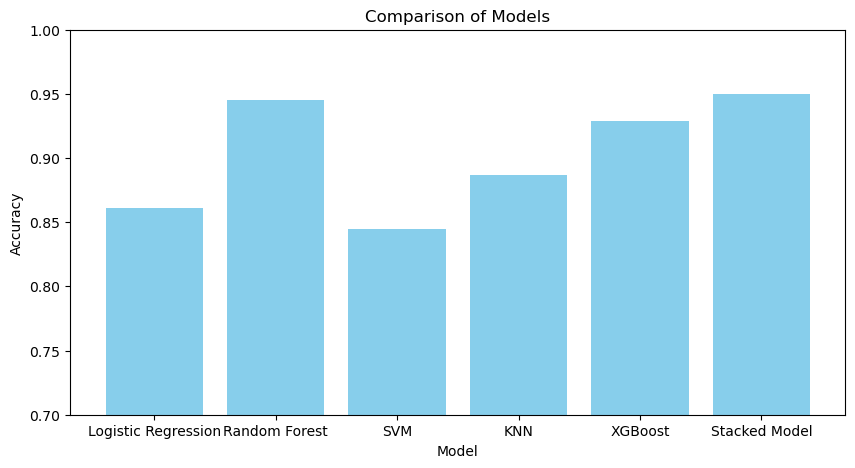

In [17]:
# Collect Accuracy Scores
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'XGBoost', 'Stacked Model']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_stack)
]

# Bar Plot
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.ylim(0.7, 1.0)  # Adjust y-axis for better clarity
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

# Define Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV for Random Forest
print("\nPerforming hyperparameter tuning for Random Forest...")
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)



Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# Evaluate Tuned Random Forest
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


--- Tuned Random Forest ---
Accuracy: 0.9495798319327731
Confusion Matrix:
 [[100   7]
 [  5 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter Grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# RandomizedSearchCV for XGBoost
print("\nPerforming hyperparameter tuning for XGBoost...")
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False), param_distributions=xgb_param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
print("\nBest Parameters for XGBoost:", random_search_xgb.best_params_)



Performing hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [21]:
# Evaluate Tuned XGBoost
y_pred_best_xgb = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_best_xgb, "Tuned XGBoost")


--- Tuned XGBoost ---
Accuracy: 0.9453781512605042
Confusion Matrix:
 [[ 99   8]
 [  5 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.94      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



Advanced Stacking(SVM model and replace the meta-model with Gradient Boosting)

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

svm_model = SVC(probability=True, kernel='linear')

stacking_clf_advanced = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('svm', svm_model)
    ],
    final_estimator=GradientBoostingClassifier()
)

stacking_clf_advanced.fit(X_train, y_train)

y_pred_stack_adv = stacking_clf_advanced.predict(X_test)
evaluate_model(y_test, y_pred_stack_adv, "Advanced Stacked Ensemble")


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Advanced Stacked Ensemble ---
Accuracy: 0.9411764705882353
Confusion Matrix:
 [[102   5]
 [  9 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       107
           1       0.96      0.93      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



Hard Voting(Majority Rule):

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create a voting classifier
ensemble_model = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='hard'
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy (Hard Voting): {ensemble_accuracy * 100:.2f}%")


Ensemble Accuracy (Hard Voting): 94.96%


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Soft Voting (Weighted Probabilities)

In [24]:
# Create a voting classifier with soft voting
ensemble_model_soft = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft',
    weights=[1, 2]  # Assign higher weight to XGBoost if it performs better
)

# Train and evaluate
ensemble_model_soft.fit(X_train, y_train)
y_pred_ensemble_soft = ensemble_model_soft.predict(X_test)
ensemble_soft_accuracy = accuracy_score(y_test, y_pred_ensemble_soft)
print(f"Ensemble Accuracy (Soft Voting): {ensemble_soft_accuracy * 100:.2f}%")


Ensemble Accuracy (Soft Voting): 94.54%


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-Validation for Robust Evaluation

In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ensemble_model_soft, X, y, cv=10, scoring='accuracy')
print(f"Cross-Validated Accuracy: {cv_scores.mean() * 100:.2f}%")


c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manvitha HarishBabu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c

Cross-Validated Accuracy: 93.19%


Final Outcomes

Deploy the best models


In [26]:
import joblib

# Save the Best Model
print("\nSaving the best model...")
joblib.dump(best_rf, 'best_random_forest_model.pkl')
joblib.dump(best_xgb, 'best_xgboost_model.pkl')
joblib.dump(stacking_clf, 'stacked_model.pkl')
joblib.dump(ensemble_accuracy, 'hard_ensemble_model.pkl')
print("Models saved successfully!")



Saving the best model...
Models saved successfully!
